In [1]:
runlist=[2051] # Select one cosmic
DATASET='rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.root'

from mu2etools import *
from mu2etools import wideband
from scipy.signal import find_peaks
hep.style.use('ATLAS')  # or ATLAS/LHCb2

In [2]:
processor = wideband.DataProcessor(runlist=runlist, userunlist=True, remove=False, fixtimes=False, 
                                   treename='run', filter_name=["PEs", "fitStatus"])
arr = processor.getData(DATASET) # get akward array for "run" tree

Processing file: rec.mu2e.CRV_wideband_cosmics-noadc.CRVWB-000-008-000.002051_002.root - 100.0% complete

In [3]:
good_fit = arr.fitStatus!=2
arr.PEs = ak.mask(arr.PEs, good_fit)

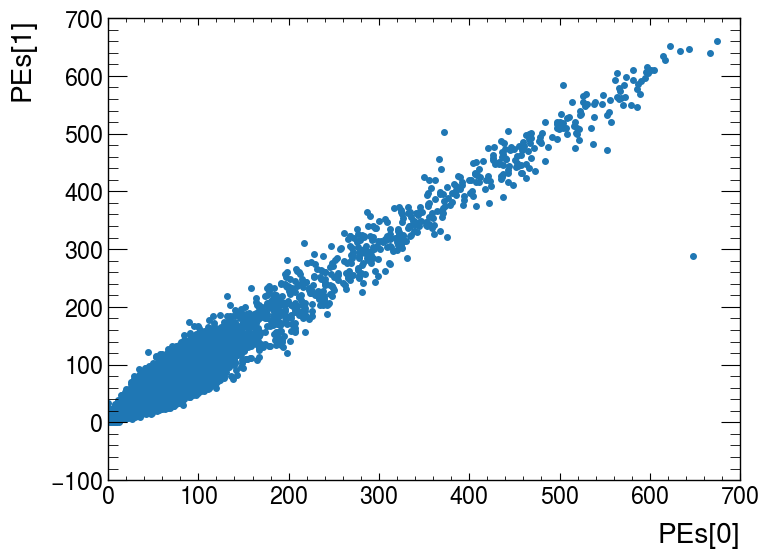

In [4]:
#Histogram 1st vs 2nd channel from FEB0
plt.plot(arr.PEs[:,0,0], arr.PEs[:,0,1], '.');
plt.xlabel('PEs[0]');
plt.ylabel('PEs[1]');

In [5]:
PE0_cut = (arr.PEs[:,0,0]>80) & (arr.PEs[:,0,0]<120)
arr.PEs = ak.mask(arr.PEs, PE0_cut)

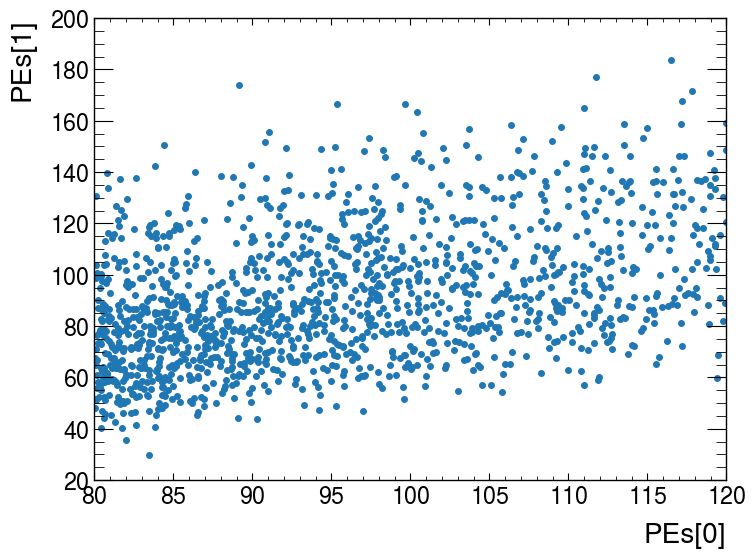

In [6]:
#Histogram 1st vs 2nd channel from FEB0
plt.plot(arr.PEs[:,0,0], arr.PEs[:,0,1], '.');
plt.xlabel('PEs[0]');
plt.ylabel('PEs[1]');

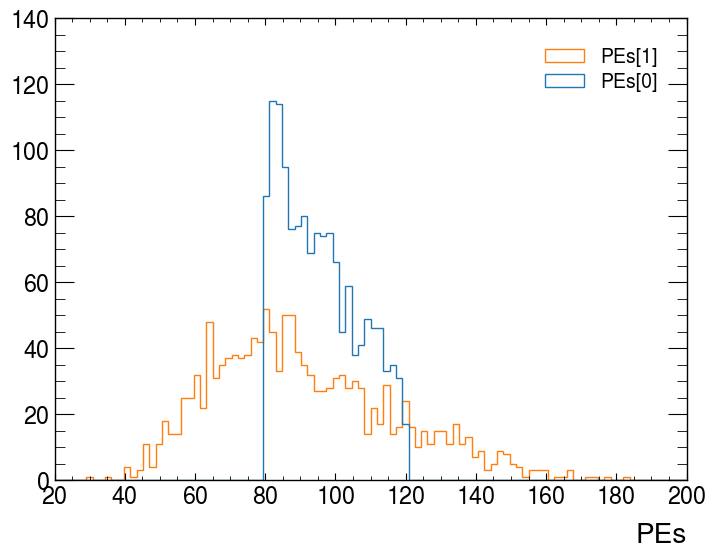

In [7]:
#Histogram channels 0 and 1 from FEB0
plt.hist(arr.PEs[:,0,0:2], histtype='step', range=(20,200), bins=100, label=['PEs[0]', 'PEs[1]']);
plt.xlabel('PEs');
plt.legend();

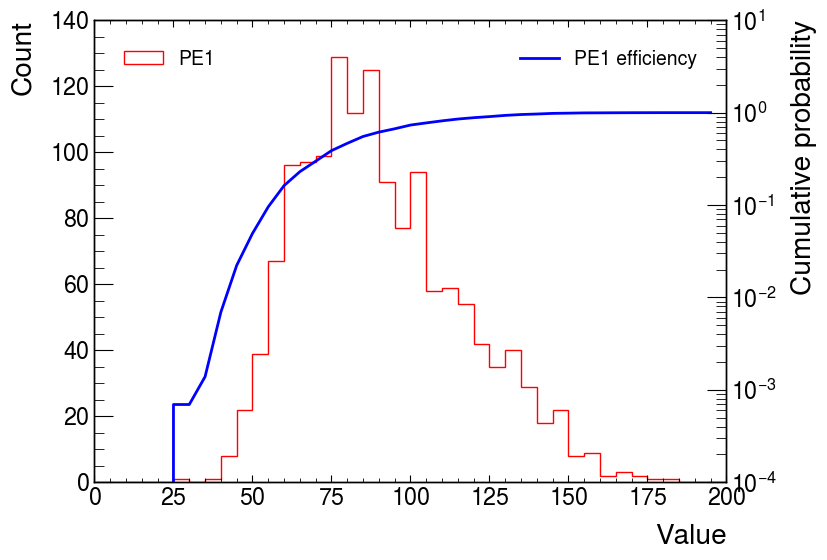

In [10]:
# Remove None values
PE1 = arr.PEs[:, 0, 1][~ak.is_none(arr.PEs[:, 0, 1])]
# Histogram PE1
values, bins = np.histogram(PE1.to_numpy(), bins=40, range=(0, 200))
# Evaluate the cumulative
cumulative = np.cumsum(values) / np.sum(values)

fig, ax1 = plt.subplots()
# Plot PE1
ax1.hist(PE1, bins=40, range=(0, 200), histtype='step', color='red', label='PE1')
ax1.set_xlabel('Value')
ax1.set_ylabel('Count')
ax1.legend(loc='upper left')

# Create a secondary axis for the cumulative plot
ax2 = ax1.twinx()
# Plot the cumulative function. Remove the last bin from x-axis
ax2.plot(bins[:-1], cumulative, c='blue', label='PE1 efficiency')
ax2.set_ylabel('Cumulative probability')
ax2.set_yscale('log')
ax2.legend(loc='upper right');